# **Data Wrangling Project 2024**
---

In fulfillment of the course *Data Wrangling XB_0014* at the *Vrije Universiteit Amsterdam*.<br>
This project was conducted by **Alvaro Pratama Maharto, Michael Evan Sutanto, Mahmoud Ashtar, and Miguel Sadorra.**

#### **TOPIC**: Marketing Strategy Effectivity
This research will be taking a look at the effects of different types of marketing campaigns and their effectivity in terms of clickthrough rate, customer engagement, and customer acquisition.
We will be having a look at the dataset with the following question in mind:
### **RESEARCH QUESTION**:
*How do different marketing strategies, particularly those used in bulk campaigns, impact the overall effectiveness of marketing initiatives, considering metrics such as clickthrough rates, customer engagement, and customer acquisition?*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
campaigns_df = pd.read_csv("campaigns.csv")
messages_df = pd.read_csv("messages-demo.csv")

messages_df.head()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7296\1183315834.py:2: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv("messages-demo.csv")


,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [3]:
print(len(messages_df))
print(len(campaigns_df))

10000000
1907


### Sampling
Since the data is about 10 million rows big, the group decided to use only a sample of 40% of the data to cut down on computing time.

In [4]:
# messages_df = messages_df[messages_df["message_type"] == "bulk"] # since bulk campaigns are over 93% of the campaigns we are only working with bulk messages and bulk campaings
# campaigns_df = campaigns_df[campaigns_df["campaign_type"] == "bulk"]

messages_sample = messages_df.sample(frac= 0.40, random_state= 42, replace= False)

In [5]:
messages_sample.head()
print(len(messages_sample))

4000000


### Cleaning up the data
We will eliminate all of the unneccessary columns from the dataframes we created above and consolidate them into one `merged_df`

In [6]:
print("Messages Database:\n",list(messages_df.columns),"\n")
print("Campaigns Database:\n",list(campaigns_df.columns))

# our sample has many columns >>> some are disposable and some are missing the majority of the values => these will be dropped

messages_sample = messages_sample.drop(["id", "category", "platform", "stream", "hard_bounced_at", "soft_bounced_at",
                                         "is_soft_bounced", "is_hard_bounced",  "blocked_at", "updated_at", "is_complained",
                                         "complained_at", "opened_first_time_at", "clicked_last_time_at", "unsubscribed_at",
                                         "created_at", "message_type", "message_id", "date", "email_provider",
                                         "opened_last_time_at", "clicked_first_time_at"],
                                           axis= 1)

campaigns_df = campaigns_df.drop(["ab_test", "warmup_mode", "hour_limit", "is_test", "position", "campaign_type"], axis=1)



Messages Database:
 ['id', 'message_id', 'campaign_id', 'message_type', 'client_id', 'channel', 'category', 'platform', 'email_provider', 'stream', 'date', 'sent_at', 'is_opened', 'opened_first_time_at', 'opened_last_time_at', 'is_clicked', 'clicked_first_time_at', 'clicked_last_time_at', 'is_unsubscribed', 'unsubscribed_at', 'is_hard_bounced', 'hard_bounced_at', 'is_soft_bounced', 'soft_bounced_at', 'is_complained', 'complained_at', 'is_blocked', 'blocked_at', 'is_purchased', 'purchased_at', 'created_at', 'updated_at'] 

Campaigns Database:
 ['id', 'campaign_type', 'channel', 'topic', 'started_at', 'finished_at', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_test', 'position']


In [7]:
display(messages_sample[:10])

,campaign_id,client_id,channel,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,purchased_at
919213,64,1515915625627233152,mobile_push,2021-04-30 08:47:49,f,f,t,f,f,NaN
9467153,19017,1515915625490484296,email,2021-06-09 10:20:24,f,f,f,f,f,NaN
6585777,152,1515915625468236701,email,2021-05-24 08:00:41,f,f,f,f,f,NaN
3878022,111,1515915625629380670,mobile_push,2021-05-12 08:11:23,f,f,f,f,f,NaN
5537116,150,1515915625501027566,email,2021-05-21 08:06:56,f,f,f,f,f,NaN
5893459,150,1515915625487280848,email,2021-05-21 07:02:26,f,f,f,f,f,NaN
8653685,298,1515915625490791354,mobile_push,2021-06-03 13:00:18,f,f,f,f,f,NaN
6880281,18012,1515915625500435910,email,2021-05-25 18:25:50,f,f,f,f,f,NaN
9478495,18212,1515915625559278997,email,2021-06-09 07:35:14,f,f,f,f,f,NaN
2930982,18016,1515915625567624693,email,2021-05-12 06:15:55,f,f,f,f,f,NaN


In [8]:
display(campaigns_df[:10])

,id,channel,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,False,False,True,False,False,False
1,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,False,False,True,False,False,False
2,78,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080.0,146.0,False,False,True,False,False,False
3,79,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838.0,97.0,False,False,True,False,False,False
4,89,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503.0,109.0,False,True,True,False,False,False
5,110,mobile_push,sale out,2021-05-12 07:38:32.980268,2021-05-12 07:40:16,90816.0,146.0,False,False,True,False,False,False
6,111,mobile_push,sale out,2021-05-12 07:44:41.865082,2021-05-12 08:16:07,1045217.0,97.0,False,False,True,False,False,False
7,129,email,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,3.0,133.0,False,False,True,False,False,False
8,136,email,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,177363.0,133.0,False,False,True,False,False,False
9,138,mobile_push,sale out,2021-05-19 07:00:11.105536,2021-05-19 07:21:42,37889.0,146.0,False,False,True,False,False,False


In [9]:
merged_df = pd.merge(messages_sample, campaigns_df, left_on = "campaign_id", right_on= "id" ,how= "inner")
print(merged_df.isna().sum())

campaign_id                           0
client_id                             0
channel_x                             0
sent_at                               0
is_opened                             0
is_clicked                            0
is_unsubscribed                       0
is_blocked                            0
is_purchased                          0
purchased_at                    4493035
id                                    0
channel_y                             0
topic                             28914
started_at                      1673087
finished_at                     1673087
total_count                     1673087
subject_length                   855767
subject_with_personalization     855767
subject_with_deadline            855767
subject_with_emoji               855767
subject_with_bonuses             855767
subject_with_discount            855767
subject_with_saleout             855767
dtype: int64


In [10]:
print(merged_df['topic'].value_counts())
# I WOULD SAY ['TOPIC'] is a pretty irrelevant column (TO_DROP())

bool_channel = (merged_df['channel_x'] == merged_df['channel_y'])
print(bool_channel.value_counts())
# channel_x and channel_y are identical


bool_id = (merged_df['campaign_id'] == merged_df['id'])
print(bool_id.value_counts())
# campaign_id and id are identical


topic
sale out                      2789394
order ready for pickup         485936
abandoned view                 223109
recent purchase                189101
abandoned category             156234
subscribed                     120910
order created                   97071
abandoned cart                  96768
bonuses expired                 67715
order reminder                  66210
order cancelled                 56819
abandoned search                36260
added to wish list              33361
profile updated                 26197
order shipped                   15527
event                            6599
order pickup still pending       1843
price drop                         24
wish list status                    2
Name: count, dtype: int64
True     3161473
False    1336521
Name: count, dtype: int64
True    4497994
Name: count, dtype: int64


### Converting string and bool values to binary
Since the database contains a lot of string values to represent True or False, we will convert these values to binary to have an easier time understanding the database and using it to analyze the data.

In [11]:
def convert_to_binary(value):
    value_lower = str(value).lower()
    if value_lower == 't':
        return 1
    elif value_lower == 'f':
        return 0
    else:
        return value

merged_df = merged_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
merged_df = merged_df.applymap(convert_to_binary)


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7296\3826681609.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7296\3826681609.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(convert_to_binary)


In [12]:
pd.set_option('display.max_columns', None)
display(merged_df[:10])

,campaign_id,client_id,channel_x,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,purchased_at,id,channel_y,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,64,1515915625627233152,mobile_push,2021-04-30 08:47:49,0,0,1,0,0,NaN,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0
1,64,1515915625627233152,mobile_push,2021-04-30 08:47:49,0,0,1,0,0,NaN,64,email,order ready for pickup,NaN,NaN,NaN,139.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64,1515915625490165431,mobile_push,2021-04-30 07:37:51,0,0,0,0,0,NaN,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0
3,64,1515915625490165431,mobile_push,2021-04-30 07:37:51,0,0,0,0,0,NaN,64,email,order ready for pickup,NaN,NaN,NaN,139.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64,1515915625591164203,mobile_push,2021-04-30 08:18:05,0,0,0,0,0,NaN,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0
5,64,1515915625591164203,mobile_push,2021-04-30 08:18:05,0,0,0,0,0,NaN,64,email,order ready for pickup,NaN,NaN,NaN,139.0,0.0,0.0,0.0,0.0,0.0,0.0
6,64,1515915625549664968,mobile_push,2021-04-30 07:40:46,0,0,0,0,0,NaN,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0
7,64,1515915625549664968,mobile_push,2021-04-30 07:40:46,0,0,0,0,0,NaN,64,email,order ready for pickup,NaN,NaN,NaN,139.0,0.0,0.0,0.0,0.0,0.0,0.0
8,64,1515915625596253090,mobile_push,2021-04-30 08:20:41,0,0,0,0,0,NaN,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0
9,64,1515915625596253090,mobile_push,2021-04-30 08:20:41,0,0,0,0,0,NaN,64,email,order ready for pickup,NaN,NaN,NaN,139.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
merged_df['channel_x'].value_counts()

channel_x
email          2374731
mobile_push    2123157
web_push           106
Name: count, dtype: int64

Need to check whether each type of `subject_type` affects `is_opened` and `is_purchased`

# Analyzing the Data
The group will now be analyzing the data in this section. We will be looking at important characteristics of the marketing campaign subjects and its effectiveness with regard to clickthrough rate which campaigns result in client purchase.

In [14]:
pd.pivot_table(merged_df,
                values='is_purchased',
                index=['subject_with_emoji', 'subject_with_personalization'],
                aggfunc='count')

is_purchased
subject_with_emoji subject_with_personalization              
0.0                0.0                                 749603
1.0                0.0                                2890074
                   1.0                                   2550

In [15]:
# can remove since every row has an emoji
emoji = merged_df.groupby("subject_with_emoji")['is_purchased'].value_counts()

# can remove since none have bonuses lol
bonuses = merged_df.groupby("subject_with_bonuses")['is_purchased'].value_counts()
display(bonuses)
display(emoji)

subject_with_bonuses  is_purchased
0.0                   0               3571529
                      1                  2983
1.0                   0                 67653
                      1                    62
Name: count, dtype: int64

subject_with_emoji  is_purchased
0.0                 0                747604
                    1                  1999
1.0                 0               2891578
                    1                  1046
Name: count, dtype: int64

### Marketing effect on Purchases
We will look at the effectiveness of advertising **<u>subject customization</u>** on sales.

In [16]:
personalization = merged_df.groupby('subject_with_personalization')['is_purchased'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_purchased'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_purchased'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_purchased'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_purchased', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [17]:
display(final_result)

personalization       deadline       discount        saleout  \
                           0     1        0     1        0     1        0   
is_purchased                                                                
0                    3636635  3042  3529545  2787  3626754  3042  3546353   
1                       2547     3   109637   258    12428     3    92829   

                    
                 1  
is_purchased        
0             3034  
1               11

After getting the correct dataframe with the effects of subject customization, we will then look at the improvement on sales per customization type (e.g. message personalization, messages with deadlines, message with discounts, message with saleouts).

In [18]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_purchased              0         1
                                     
personalization 0  0.999300  0.000700
                1  0.999015  0.000985
deadline        0  0.969873  0.030127
                1  0.915271  0.084729
discount        0  0.996585  0.003415
                1  0.999015  0.000985
saleout         0  0.974492  0.025508
                1  0.996388  0.003612

<strong>Marketing results on Sales</strong>

,Difference,Percent Increase
Personalization,0.000285,40.769571
Deadline,0.054602,181.241264
Discount,-0.002430,-71.150620
Saleout,-0.021896,-85.837971


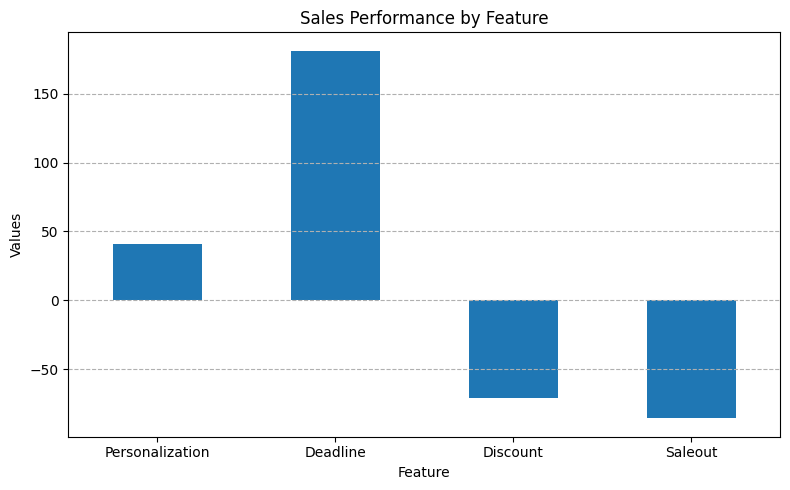

In [19]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100
    return diff_1, percentage_inc

personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff],
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]},
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])

display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance on Clickthrough Rate


In [20]:
personalization = merged_df.groupby('subject_with_personalization')['is_clicked'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_clicked'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_clicked'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_clicked'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_clicked', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [21]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_clicked                0         1
                                     
personalization 0  0.999328  0.000672
                1  0.997376  0.002624
deadline        0  0.970364  0.029636
                1  0.933224  0.066776
discount        0  0.996609  0.003391
                1  0.995114  0.004886
saleout         0  0.974365  0.025635
                1  0.984409  0.015591

In [22]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100
    return diff_1, percentage_inc

personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff],
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]},
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])
display(sales_performance)

,Difference,Percent Increase
Personalization,0.001952,290.495137
Deadline,0.037140,125.318121
Discount,0.001495,44.083309
Saleout,-0.010044,-39.180132


### Marketing Performance on Customer Engagement

In [23]:
personalization = merged_df.groupby('subject_with_personalization')['is_unsubscribed'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_unsubscribed'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_unsubscribed'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_unsubscribed'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_unsubscribed', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [24]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_unsubscribed           0         1
                                     
personalization 0  0.999264  0.000736
                1  0.999973  0.000027
deadline        0  0.968276  0.031724
                1  0.998698  0.001302
discount        0  0.996516  0.003484
                1  0.997912  0.002088
saleout         0  0.973227  0.026773
                1  0.998375  0.001625

,Difference,Percent Increase
Personalization,0.000709,0.070992
Deadline,0.030422,3.141859
Discount,0.001396,0.140081
Saleout,0.025147,2.583906


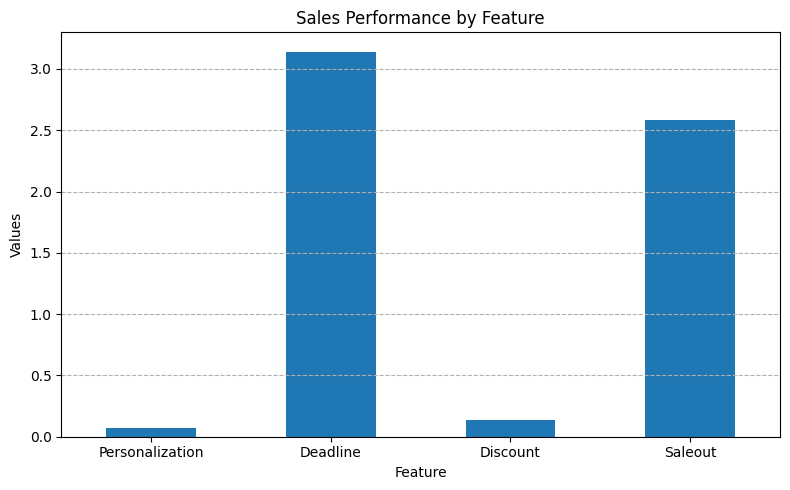

In [25]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[0][(feature, 1)] - diff_df[0][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[0][(feature, 0)]) * 100
    return diff_1, percentage_inc

personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff],
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]},
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])
display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance based on Channel Type


In [26]:
channel_type = merged_df.groupby('channel_x')
channel_purchases = channel_type['is_purchased'].value_counts()
channel_clicks = channel_type['is_clicked'].value_counts()

result = pd.concat([channel_purchases, channel_clicks], axis=1, keys=['purchased', 'clicked'])
display(result)

purchased  clicked
channel_x                        
email       0  2369772.0  2282113
            1     4959.0    92618
mobile_push 0  2123157.0  2120848
web_push    0      106.0      106
mobile_push 1        NaN     2309

### The Impact of Subject Length on Email Open Rates

is_opened  subject_length  percentage
0                    32.0    2.392561
1                    34.0    2.634022
2                    38.0    1.852542
3                    74.0   37.943421
4                    76.0   50.593824
5                    84.0    6.597025
6                    85.0   16.945057
7                    87.0   20.205866
8                    88.0   34.288776
9                    93.0   13.550035
10                   96.0   24.699222
11                   97.0   12.363313
12                   99.0   53.773585
13                  101.0   57.798165
14                  104.0         NaN
15                  106.0   28.958822
16                  109.0   17.280284
17                  111.0   24.698376
18                  112.0   14.673196
19                  115.0    8.150415
20                  117.0   23.039962
21                  119.0   15.646190
22                  125.0   16.932367
23                  127.0   50.605107
24                  129.0   15.054933
25          

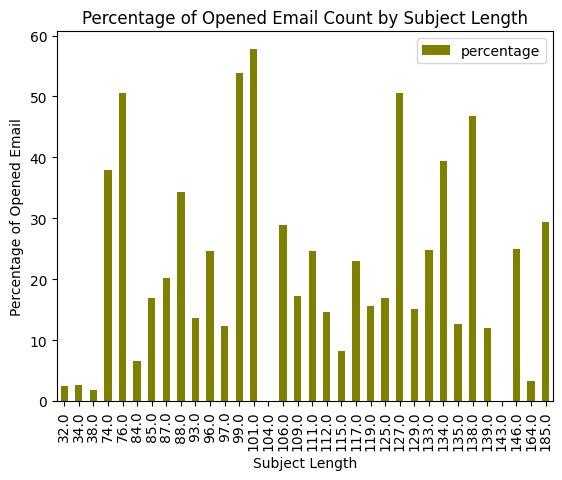

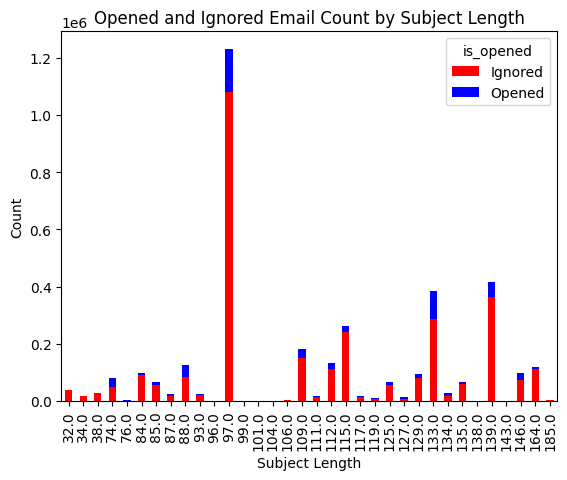

In [27]:
grouped_data = merged_df.groupby(['subject_length', 'is_opened']).size().reset_index(name='count')
opened_data = grouped_data[grouped_data['is_opened'] == 1]
ignored_data = grouped_data[grouped_data['is_opened'] == 0]

pivot_data = grouped_data.pivot(index='subject_length', columns='is_opened', values='count')
pivot_data['percentage'] = (pivot_data[1] / (pivot_data[1] + pivot_data[0])) * 100
pivot_data.reset_index(inplace=True)
print(pivot_data[['subject_length', 'percentage']])

pivot_data.plot(kind='bar', x='subject_length', y='percentage', color='olive')
plt.xlabel('Subject Length')
plt.ylabel('Percentage of Opened Email')
plt.title('Percentage of Opened Email Count by Subject Length')
plt.show()

stacked_bar = grouped_data.pivot(index='subject_length', columns='is_opened', values='count')
stacked_bar.plot(kind='bar', stacked='True', color=['red', 'blue'])
plt.xlabel('Subject Length')
plt.ylabel('Count')
plt.title('Opened and Ignored Email Count by Subject Length')
plt.legend(title='is_opened', labels=['Ignored', 'Opened'])
plt.show()

### Checking if holidays correspond to client purchases

In [28]:
holidays_df = pd.read_csv('holidays.csv')
first_purchase_df = pd.read_csv('client_first_purchase_date.csv')

from datetime import datetime
import pytz

Creating a dataframe looking at the marketing generated sales that occured during holidays:

In [29]:
temp_df = pd.DataFrame({'date_p': merged_df['purchased_at']}).reset_index()
temp_df = temp_df.dropna(subset=['date_p'])
for i in temp_df.index:
    temp_df.loc[i, 'date_p'] = pd.to_datetime(temp_df['date_p'][i]).strftime('%Y-%m-%d')

result_df = pd.merge(holidays_df, temp_df, left_on='date', right_on='date_p', how='inner')
holiday_messages_df = result_df[['holiday', 'date_p']].value_counts().reset_index(name='count')

display(holiday_messages_df)

,holiday,date_p,count
0,Independence Day,2021-06-12,140
1,Spring and Labor Day,2021-05-01,52
2,Victory day,2021-05-09,43


Creating a dataframe looking at the store sales that occured during holidays:

In [30]:
result_df = pd.merge(holidays_df, first_purchase_df, left_on='date', right_on='first_purchase_date', how='inner')
holiday_store_sales_df = result_df[['holiday', 'date']].value_counts().reset_index(name='count')
display(holiday_store_sales_df)

,holiday,date,count
0,Unity Day,2022-11-04,6416
1,Independence Day,2023-06-12,4908
2,Spring and Labor Day,2023-05-01,3831
3,Victory day,2023-05-09,3286
4,Back to School,2023-09-01,3209
5,Black Friday,2023-11-24,3004
6,International Women's Day,2022-03-08,2851
7,Fool's day,2022-04-01,2643
8,Unity Day,2023-11-04,2512
9,Cyber Monday Sale,2022-01-31,2508


Computing percentage of sales generated during holidays, with respect to the total amount of sales produced by the store.

In [31]:
fraction_messages = (holiday_store_sales_df['count'].sum() / len(first_purchase_df)) * 100
fraction_first = (holiday_messages_df['count'].sum() / merged_df['is_purchased'].sum()) * 100

print("PERCENT INCREASE IN SALES:\n")
print("Percentage of first time customer purchases that occured during a holiday:")
print(round(fraction_first,2),"%")
print("\nPercentage of marketing generated purchases that occured during a holiday:")
print(round(fraction_messages,2),"%")

PERCENT INCREASE IN SALES:

Percentage of first time customer purchases that occured during a holiday:
4.74 %

Percentage of marketing generated purchases that occured during a holiday:
3.68 %


In [32]:
print(campaigns_df["topic"].unique())
print(merged_df["topic"].unique())

clicked_per_topic = merged_df.groupby("topic")["is_clicked"].value_counts()
opened_per_topic = merged_df.groupby("topic")["is_opened"].value_counts()
purchased_per_topic = merged_df.groupby("topic")["is_purchased"].value_counts()
display(clicked_per_topic)
display(opened_per_topic)
display(purchased_per_topic)



['sale out' nan 'event' 'offer after purchase' 'happy birthday'
 'leave review' 'welcome campaign' 'abandoned cart' 'abandoned category'
 'abandoned view' 'added to wish list' 'abandoned search' 'subscribed'
 'removed from wish list' 'double opt in' 'user added to segment'
 'recent purchase' 'price drop' 'back in stock' 'order shipped'
 'order reminder' 'welcome letter' 'order ready for pickup'
 'order created' 'bonuses expired' 'order cancelled'
 'order pickup still pending' 'profile updated' 'wish list status']
['sale out' 'order ready for pickup' 'abandoned search' 'recent purchase'
 'abandoned view' 'subscribed' 'bonuses expired' 'abandoned cart'
 'order cancelled' 'order pickup still pending' 'order reminder'
 'abandoned category' 'order created' nan 'profile updated'
 'order shipped' 'event' 'added to wish list' 'price drop'
 'wish list status']


topic                       is_clicked
abandoned cart              0               93397
                            1                3371
abandoned category          0              151508
                            1                4726
abandoned search            0               35671
                            1                 589
abandoned view              0              212192
                            1               10917
added to wish list          0               31942
                            1                1419
bonuses expired             0               65812
                            1                1903
event                       0                6301
                            1                 298
order cancelled             0               54495
                            1                2324
order created               0               91820
                            1                5251
order pickup still pending  0                1758
           

topic                       is_opened
abandoned cart              0              83778
                            1              12990
abandoned category          0             134917
                            1              21317
abandoned search            0              32842
                            1               3418
abandoned view              0             185724
                            1              37385
added to wish list          0              27410
                            1               5951
bonuses expired             0              59145
                            1               8570
event                       0               4827
                            1               1772
order cancelled             0              39653
                            1              17166
order created               0              62613
                            1              34458
order pickup still pending  0               1043
                            1  

topic                       is_purchased
abandoned cart              0                 96336
                            1                   432
abandoned category          0                155884
                            1                   350
abandoned search            0                 36231
                            1                    29
abandoned view              0                222297
                            1                   812
added to wish list          0                 33242
                            1                   119
bonuses expired             0                 67653
                            1                    62
event                       0                  6593
                            1                     6
order cancelled             0                 56205
                            1                   614
order created               0                 96454
                            1                   617
order pickup still pend

In [33]:

# for i in clicked_per_topic.index:
#     print(clicked_per_topic[i[0]])
# clicked_percentage = clicked_per_topic["event"][1] / (clicked_per_topic["event"][1] + clicked_per_topic["event"][0]) * 100
# print(clicked_percentage)

print(type(clicked_per_topic))

<class 'pandas.core.series.Series'>


In [34]:

def calc_perecentage(rest, part):
    return (part / (rest + part)) * 100

def calc_percentages(col_name):
    topics_clicks = topcis_engagement.groupby("topic")[col_name].value_counts()
    # calculating clicks percentages of our chosen topics
    percentages = []
    for i in range(0, len(topics_clicks), 2):
        if i == len(topics_clicks) - 1:  # least one has 0 clicks so clicks percentage is 0%
            percentages.append(0)
            break
        percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))

    return percentages

# Choosing 5 topics with most engagement and 5 topics with least engagement
topics = merged_df["topic"].value_counts()
topics = pd.concat([topics[:5], topics[-5:]])

# filter only the topics in our engagement list
topcis_engagement = merged_df.loc[merged_df["topic"].isin(topics.index)][["topic", "is_clicked", "is_opened", "is_purchased"]]

topics_clicks = topcis_engagement.groupby("topic")["is_clicked"].value_counts()

# calculating clicks percentages of our chosen topics
clicks_percentages = calc_percentages("is_clicked")
opened_percentages = calc_percentages("is_opened")
purchased_percentages = calc_percentages("is_purchased")


print("topics with most engagement:")
for i in topics.index[:5]:
    print(i, end= ", ")
print("\n\ntopics with least engagement:")
for i in topics.index[-5:]:
    print(i, end=", ")

print("\n\n", topics)


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7296\841604187.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7296\841604187.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))


topics with most engagement:
sale out, order ready for pickup, abandoned view, recent purchase, abandoned category, 

topics with least engagement:
order shipped, event, order pickup still pending, price drop, wish list status, 

 topic
sale out                      2789394
order ready for pickup         485936
abandoned view                 223109
recent purchase                189101
abandoned category             156234
order shipped                   15527
event                            6599
order pickup still pending       1843
price drop                         24
wish list status                    2
Name: count, dtype: int64


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7296\841604187.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))


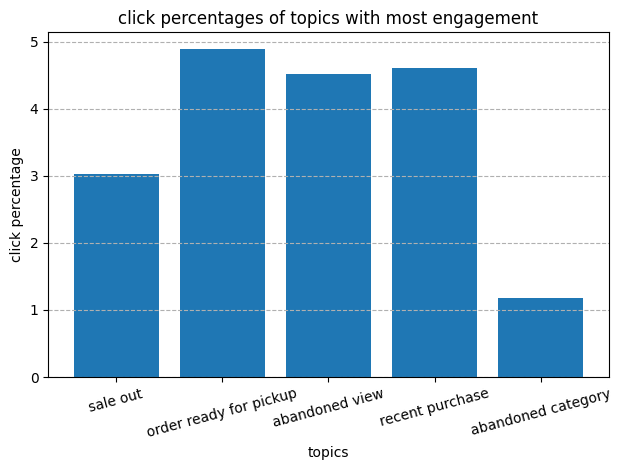

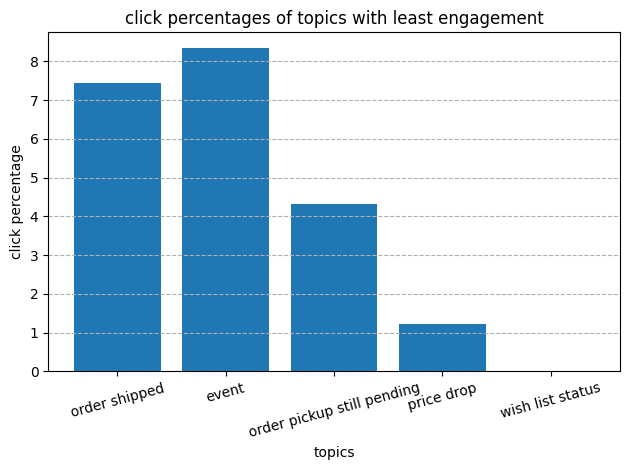

In [35]:
plt.bar(topics.index[:5].to_list(), clicks_percentages[:5])
plt.title("click percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('click percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), clicks_percentages[-5:])
plt.title("click percentages of topics with least engagement")
plt.xlabel('topics')
plt.ylabel('click percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()




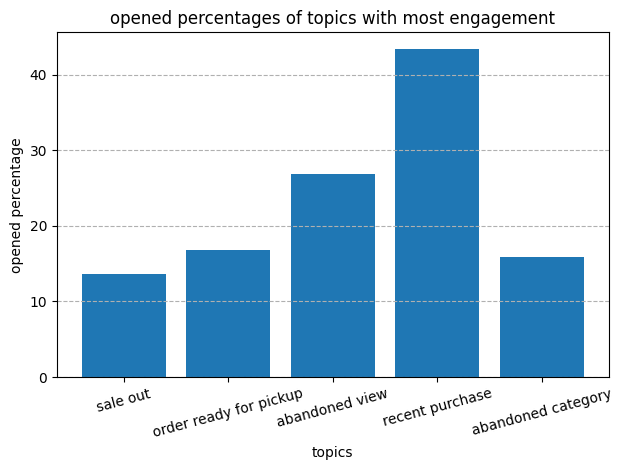

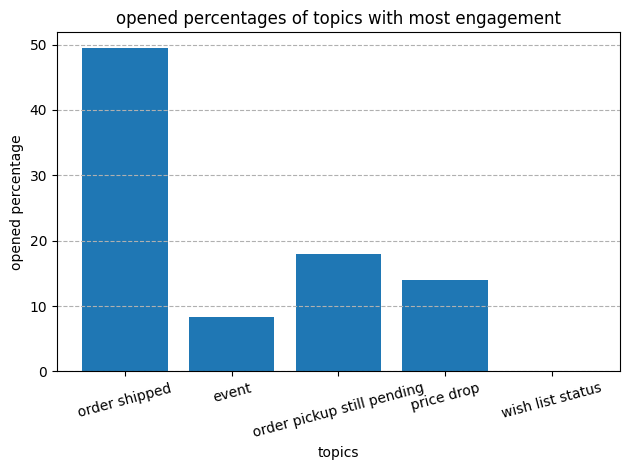

In [36]:
plt.bar(topics.index[:5].to_list(), opened_percentages[:5])
plt.title("opened percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('opened percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), opened_percentages[-5:])
plt.title("opened percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('opened percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

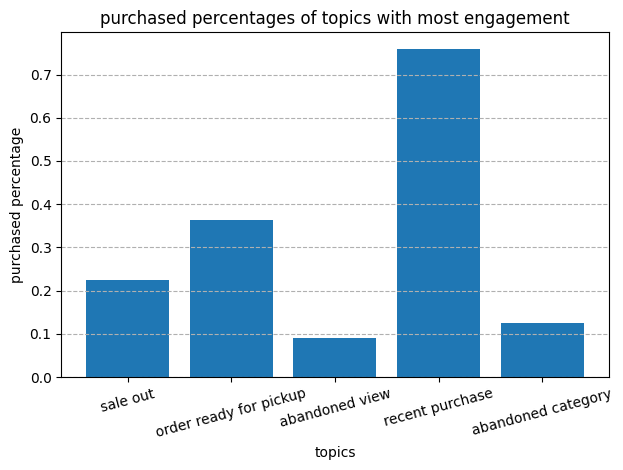

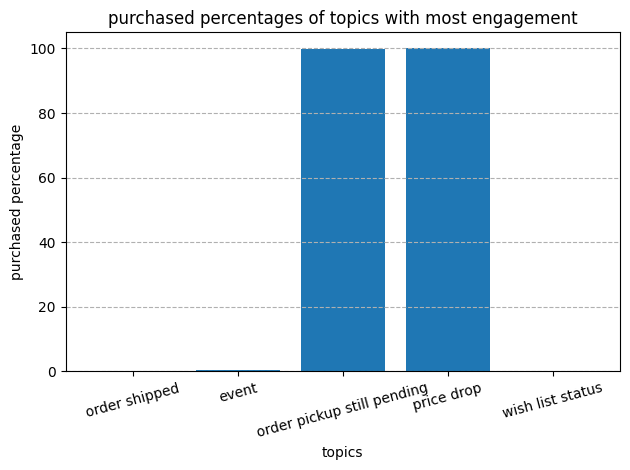

In [37]:
plt.bar(topics.index[:5].to_list(), purchased_percentages[:5])
plt.title("purchased percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('purchased percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), purchased_percentages[-5:])
plt.title("purchased percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('purchased percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**NOTE** what can we read from the plots?? I don't understand how there is a campaign with the topic order shipped!! this one is weird. maybe we should manually select the topics we want to review.
chech the effect of holidays on sales!!
heatmap to discover important features correlated with purchases, clicks, or opens.